# XSuite example of the Large Hadron Collider (LHC)
Will simulate 20 LHC cells


Tunes:
 Qx = 4.8836
 Qy = 4.8836


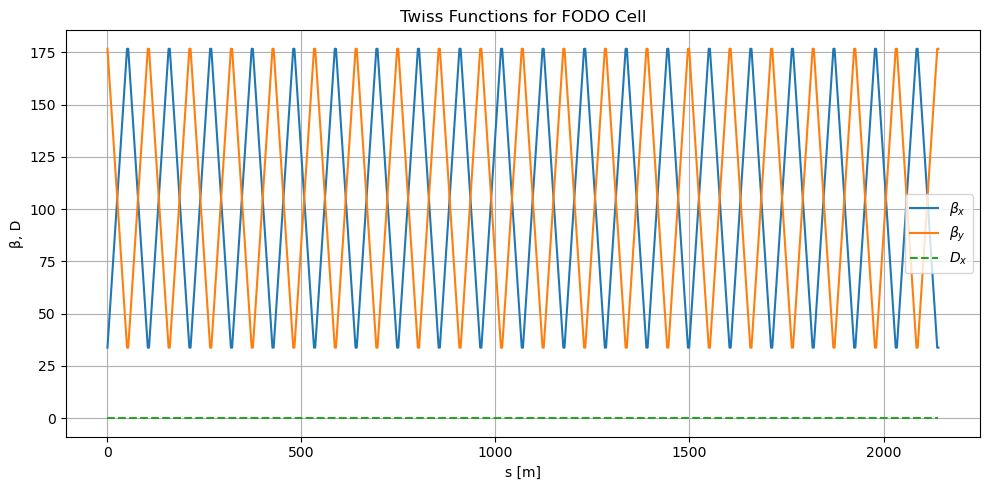

In [30]:
# Example
import xtrack as xt
import xpart as xp
import numpy as np
import matplotlib.pyplot as plt

# --- Define lattice elements ---
#
LQUAD = 3.1       # Length of a quadrupole
KQUAD = .00853   # Strength of a quad
LFODO = 53.54     # Full length of a FODO cell

qf = xt.Quadrupole(k1=KQUAD, length=LQUAD)   # focusing quad
qd = xt.Quadrupole(k1=-KQUAD, length=LQUAD)  # defocusing quad

LDRIFT = LFODO-LQUAD    # distance between quads
drift = xt.Drift(length=LDRIFT)

# One simple FODO cell: drift - QF - drift - QD
cell = [drift,qf, drift, qd]

# Repeat cell (optional)
n_cells = 20
elements = cell * n_cells

line = xt.Line(elements=elements)
line.build_tracker()

# Define a reference particle
p_ref = xp.Particles(
    mass0 = xp.Particles().mass0,  # proton mass by default
    q0 = 1,
    p0c = 7e12  # 2 GeV reference momentum
)

# Assign it to the line
line.particle_ref = p_ref
# --- Compute Twiss ---
tw = line.twiss(method='4d')

print("Tunes:")
print(f" Qx = {tw.qx:.4f}")
print(f" Qy = {tw.qy:.4f}")

# --- Plot lattice functions ---
plt.figure(figsize=(10, 5))

plt.plot(tw.s, tw.betx, label=r'$\beta_x$')
plt.plot(tw.s, tw.bety, label=r'$\beta_y$')
plt.plot(tw.s, tw.dx, '--', label=r'$D_x$')

plt.xlabel('s [m]')
plt.ylabel('β, D')
plt.title('Twiss Functions for FODO Cell')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Track a particle ---
p0 = xp.Particles(
    p0c = 1e9,  # 1 GeV reference momentum
    x = 1e-3,   # 1 mm horizontal offset
    px = 0,
    y = 0,
    py = 0,
)





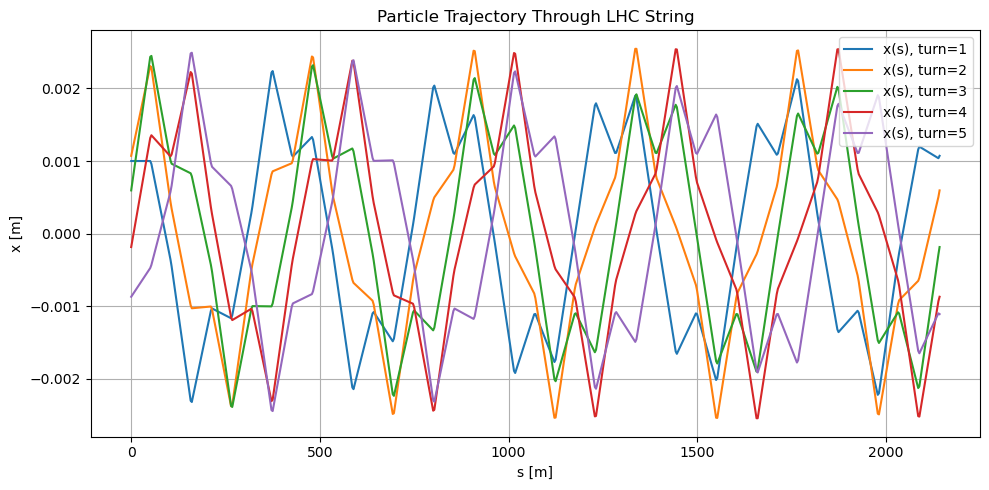


Final particle coordinates:
[-0.00111152] [-1.81262013e-05] [0.] [0.]


In [31]:
plt.figure(figsize=(10,5))

# Track through 10 turns
for i in range(5):
    line.track(p0, num_turns=1, turn_by_turn_monitor='ONE_TURN_EBE')
    record = line.record_last_track
    s_positions = record.s[0]  # s-position of each recorded point
    x_positions = record.x[0]  # horizontal trajectory
    plt.plot(s_positions, x_positions, label=f'x(s), turn={i+1}')

plt.xlabel('s [m]')
plt.ylabel('x [m]')
plt.title('Particle Trajectory Through LHC String')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


print("\nFinal particle coordinates:")
print(p0.x, p0.px, p0.y, p0.py)